In [13]:
# importando os dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

covid = pd.read_csv('../Covid Dataset.csv')
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [14]:
# visualização inicial
covid.shape

(5434, 21)

In [15]:
# Remove espaços extras
covid.columns = covid.columns.str.strip()
covid = covid.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

# Dicionário para traduzir colunas
colunas_traduzidas = {
    "Breathing Problem": "Problema Respiratório",
    "Fever": "Febre",
    "Dry Cough": "Tosse Seca",
    "Sore throat": "Dor de Garganta",
    "Running Nose": "Coriza",
    "Asthma": "Asma",
    "Chronic Lung Disease": "Doença Pulmonar Crônica",
    "Headache": "Dor de Cabeça",
    "Heart Disease": "Doença Cardíaca",
    "Diabetes": "Diabetes",
    "Hyper Tension": "Hipertensão",
    "Fatigue": "Fadiga",
    "Gastrointestinal": "Problemas Gastrointestinais",
    "Abroad travel": "Viagem ao Exterior",
    "Contact with COVID Patient": "Contato com Paciente COVID",
    "Attended Large Gathering": "Participou de Multidão",
    "Visited Public Exposed Places": "Visitou Locais Públicos",
    "Family working in Public Exposed Places": "Familiar em Local Público",
    "Wearing Masks": "Uso de Máscaras",
    "Sanitization from Market": "Higienização do Local de Trabalho"
}

# Aplicar a tradução nas colunas e linhas
covid.rename(columns=colunas_traduzidas, inplace=True)
covid.replace({"Yes": "Sim", "No": "Não"}, inplace=True)

covid

,Problema Respiratório,Febre,Tosse Seca,Dor de Garganta,Coriza,Asma,Doença Pulmonar Crônica,Dor de Cabeça,Doença Cardíaca,Diabetes,...,Fadiga,Problemas Gastrointestinais,Viagem ao Exterior,Contato com Paciente COVID,Participou de Multidão,Visitou Locais Públicos,Familiar em Local Público,Uso de Máscaras,Higienização do Local de Trabalho,COVID-19
0,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Sim,...,Sim,Sim,Não,Sim,Não,Sim,Sim,Não,Não,Sim
1,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Não,Não,...,Sim,Não,Não,Não,Sim,Sim,Não,Não,Não,Sim
2,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,...,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Sim
3,Sim,Sim,Sim,Não,Não,Sim,Não,Não,Sim,Sim,...,Não,Não,Sim,Não,Sim,Sim,Não,Não,Não,Sim
4,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,...,Não,Sim,Não,Sim,Não,Sim,Não,Não,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Sim,Sim,Não,Sim,Sim,Sim,Sim,Não,Não,Não,...,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Sim
5430,Sim,Sim,Sim,Não,Sim,Sim,Não,Sim,Não,Sim,...,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Sim
5431,Sim,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
5432,Sim,Sim,Sim,Não,Sim,Não,Não,Sim,Sim,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [16]:
# verificação de dados
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Problema Respiratório              5434 non-null   object
 1   Febre                              5434 non-null   object
 2   Tosse Seca                         5434 non-null   object
 3   Dor de Garganta                    5434 non-null   object
 4   Coriza                             5434 non-null   object
 5   Asma                               5434 non-null   object
 6   Doença Pulmonar Crônica            5434 non-null   object
 7   Dor de Cabeça                      5434 non-null   object
 8   Doença Cardíaca                    5434 non-null   object
 9   Diabetes                           5434 non-null   object
 10  Hipertensão                        5434 non-null   object
 11  Fadiga                             5434 non-null   object
 12  Proble

In [17]:
# buscando valores nulos
covid.isnull().sum()

Problema Respiratório                0
Febre                                0
Tosse Seca                           0
Dor de Garganta                      0
Coriza                               0
Asma                                 0
Doença Pulmonar Crônica              0
Dor de Cabeça                        0
Doença Cardíaca                      0
Diabetes                             0
Hipertensão                          0
Fadiga                               0
Problemas Gastrointestinais          0
Viagem ao Exterior                   0
Contato com Paciente COVID           0
Participou de Multidão               0
Visitou Locais Públicos              0
Familiar em Local Público            0
Uso de Máscaras                      0
Higienização do Local de Trabalho    0
COVID-19                             0
dtype: int64

In [18]:
# Descrição dos dados
covid.describe(include='all')

,Problema Respiratório,Febre,Tosse Seca,Dor de Garganta,Coriza,Asma,Doença Pulmonar Crônica,Dor de Cabeça,Doença Cardíaca,Diabetes,...,Fadiga,Problemas Gastrointestinais,Viagem ao Exterior,Contato com Paciente COVID,Participou de Multidão,Visitou Locais Públicos,Familiar em Local Público,Uso de Máscaras,Higienização do Local de Trabalho,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Sim,Sim,Sim,Sim,Sim,Não,Não,Sim,Não,Não,...,Sim,Não,Não,Sim,Não,Sim,Não,Não,Não,Sim
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [19]:
# Detecta variáveis constantes (sem variabilidade)
constantes = covid.nunique()
constantes[constantes == 1]

# As variáveis Uso de Máscara e Higienização do Local de Trabalho têm 100% das respostas iguais ("Sim").
# Isso significa que não possuem variação e, portanto, não contribuem com informações úteis para modelos
# de previsão ou análise de correlação.

Uso de Máscaras                      1
Higienização do Local de Trabalho    1
dtype: int64

In [24]:
# Remover colunas não preditivas
covid = covid.drop(['Uso de Máscaras', 'Higienização do Local de Trabalho'], axis=1)

C:\Users\mucad\AppData\Local\Temp\ipykernel_8304\18706505.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='COVID-19', data=covid, palette=[ "#f1554a", "#14eda8"])  # No, Yes


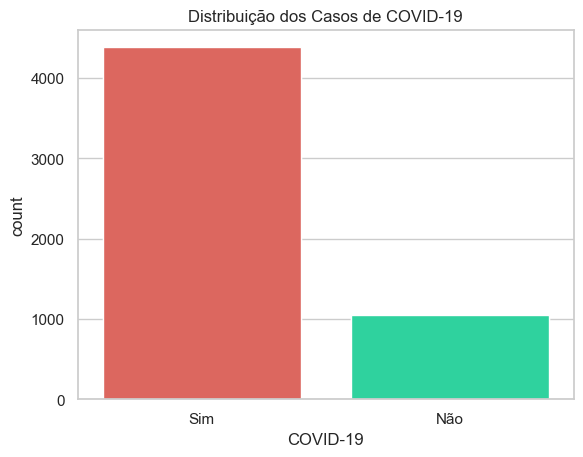

In [25]:
# Visualizando a distribuiçao de casos do COVID-19

sns.countplot(x='COVID-19', data=covid)
plt.title('Distribuição dos Casos de COVID-19')
ax = sns.countplot(x='COVID-19', data=covid, palette=[ "#f1554a", "#14eda8"])  # No, Yes
plt.show()

<Figure size 1400x700 with 0 Axes>

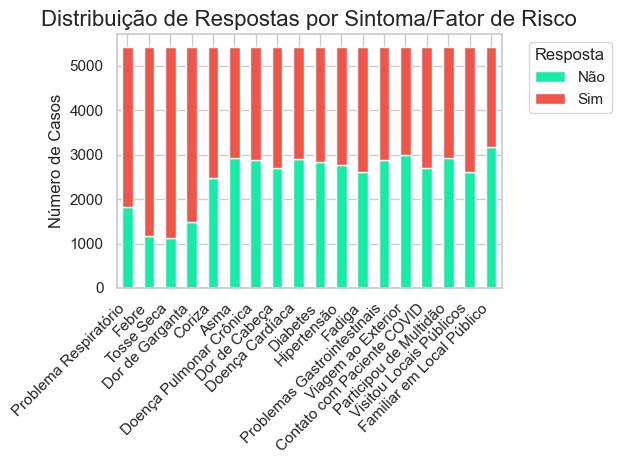

In [26]:
# Visualizando os casos de COVID de acordo com cada variavel

# Preparar os dados
df_plot = covid.drop('COVID-19', axis=1).apply(lambda x: x.value_counts()).T
df_plot = df_plot.fillna(0)  # Preencher valores ausentes com 0
df_plot.columns.name = 'Resposta'  # Nome do eixo da legenda
df_plot.index.name = 'Sintoma/Fator de Risco'

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Cores personalizadas
cores = ["#14eda8", "#f1554a"]  # Yes (verde), No (laranja)

# Gráfico de barras empilhadas
df_plot.plot(kind='bar', stacked=True, color=cores)

# Título e rótulos
plt.title('Distribuição de Respostas por Sintoma/Fator de Risco', fontsize=16)
plt.ylabel('Número de Casos', fontsize=12)
plt.xlabel('')

# Rotação e formatação dos rótulos do eixo X
plt.xticks(rotation=45, ha='right')

# Legenda fora do gráfico
plt.legend(title='Resposta', bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout ajustado
plt.tight_layout()

plt.show()


C:\Users\mucad\AppData\Local\Temp\ipykernel_8304\3657318171.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_bin = covid.replace({'Sim': 1, 'Não': 0})


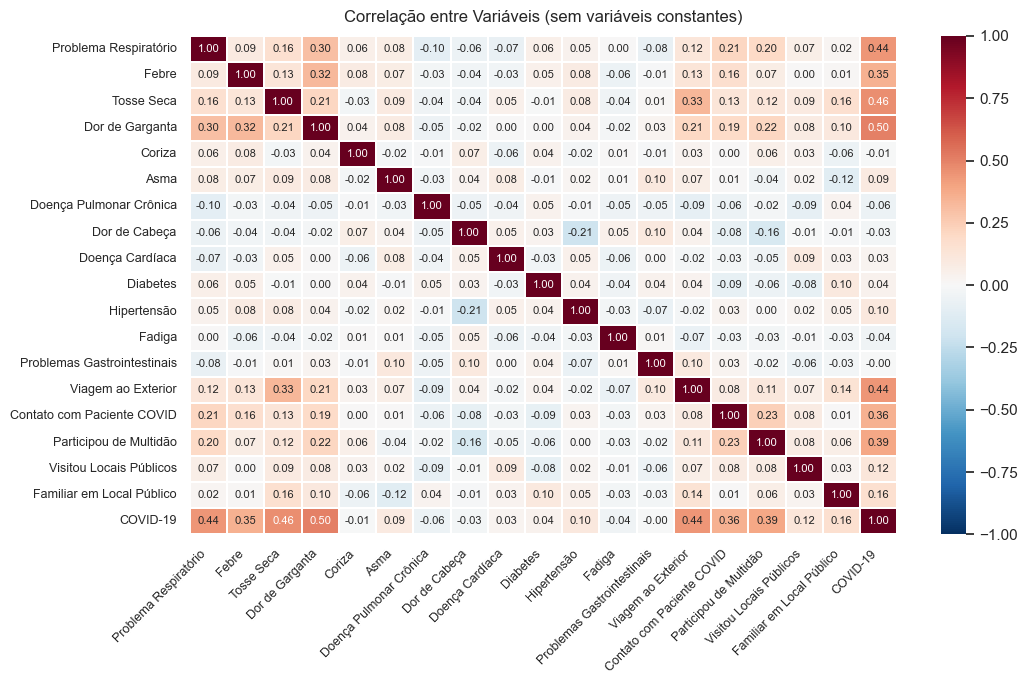

In [27]:
# Visualizando correlação entre os sintomas e variaveis da COVID-19


# Converter 'Sim'/'Não' para 1/0
covid_bin = covid.replace({'Sim': 1, 'Não': 0})

# Matriz de correlação
corr_matrix = covid_bin.corr()

# Plot do heatmap simples e limpo
plt.figure(figsize=(11, 7))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt='.2f',
            vmin=-1, vmax=1, cbar=True, linewidths=0.2,
            annot_kws={"size": 8})

plt.title('Correlação entre Variáveis (sem variáveis constantes)', fontsize=12, pad=10)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()
